In [22]:
# import modules
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load dataset
ames = pd.read_csv("/Users/mymacpro/Documents/PROJECTS/house-predict/data/train.csv")
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## MSZoning
### Categories in dataset:  
       C	Commercial
       FV	Floating Village Residential  
       RH	Residential High Density  
       RL	Residential Low Density  
       RM	Residential Medium Density  
       
### Categories not in dataset (possiblely included in C(all)):  
       RP	Residential Low Density Park
       A	Agriculture
       I	Industrial


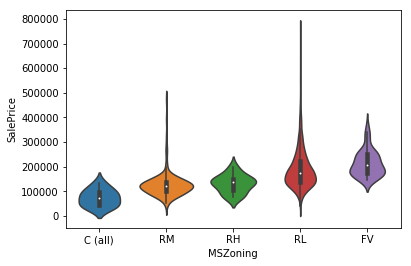

In [14]:
sns.violinplot(x="MSZoning", y="SalePrice",order=["C (all)","RM", "RH", "RL","FV"],data=ames)

In [7]:
ames.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
# c(all)???  does this include other categories? why price for commercial zone so low???

In [10]:
# ANOVA test
stats.f_oneway(ames.SalePrice[ames.MSZoning == "RL"],
              ames.SalePrice[ames.MSZoning == "RM"],
              ames.SalePrice[ames.MSZoning == "FV"],
              ames.SalePrice[ames.MSZoning == "RH"],
              ames.SalePrice[ames.MSZoning == "C (all)"])

F_onewayResult(statistic=43.84028167245718, pvalue=8.817633866272648e-35)

In [15]:
pvalue=8.817633866272648e-35

## Neighborhood  
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [16]:
ames.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

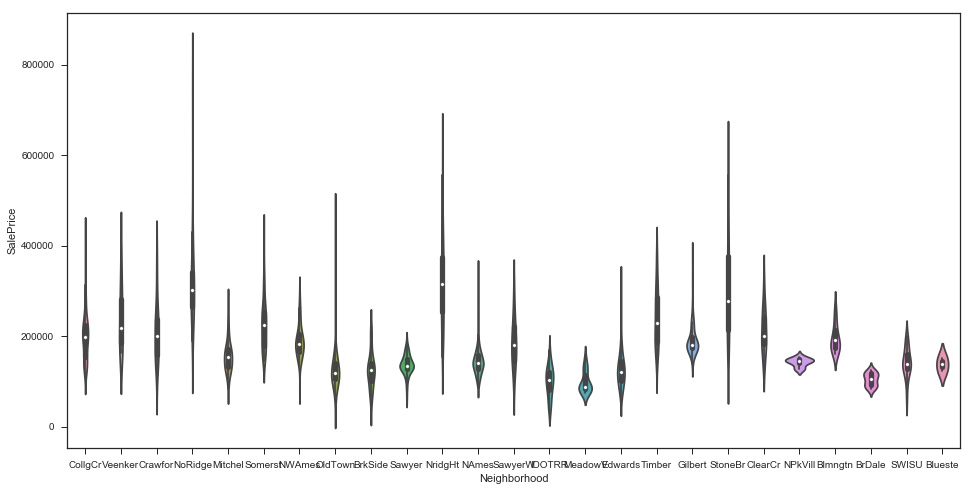

In [64]:
sns.set(style="ticks")
plt.figure(figsize=(16, 8))
sns.violinplot(x="Neighborhood", y="SalePrice", data=ames)

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('SalePrice ~ Neighborhood',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                    sum_sq      df          F         PR(>F)
Neighborhood  5.023606e+12    24.0  71.784865  1.558600e-225
Residual      4.184305e+12  1435.0        NaN            NaN


## MSSubClass  
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [42]:
ames.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

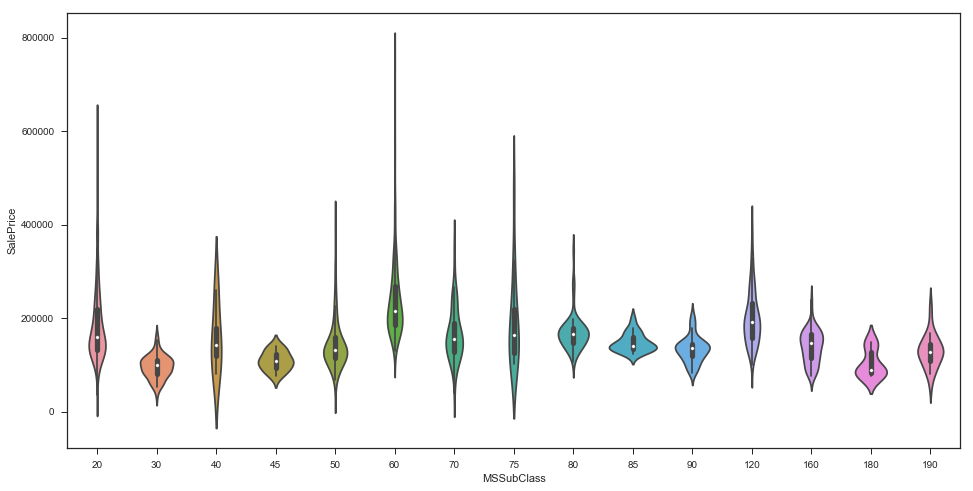

In [63]:
sns.set(style="ticks")
plt.figure(figsize=(16, 8))
sns.violinplot(x="MSSubClass", y="SalePrice", data=ames)

In [44]:
mod = ols('SalePrice ~ MSSubClass',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df          F    PR(>F)
MSSubClass  6.541130e+10     1.0  10.431466  0.001266
Residual    9.142500e+12  1458.0        NaN       NaN


## LotFrontage

In [72]:
# check for NA value, 17.74% NA
print(ames.LotFrontage.isnull().sum())
print(ames.LotFrontage.isnull().sum()/len(ames.LotFrontage))

259
0.1773972602739726


In [141]:
ames.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

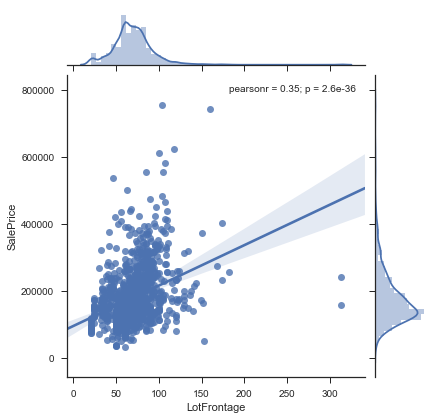

In [47]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=ames, kind="reg") 

In [148]:
#stats.linregress(ames.LotFrontage, ames.SalePrice)
mod = ols('SalePrice ~ LotFrontage',data=ames, missing = "drop")
print(mod.fit().params)
mod.fit().pvalues

Intercept      96149.041503
LotFrontage     1208.015549
dtype: float64


Intercept      3.293419e-41
LotFrontage    2.602442e-36
dtype: float64

## LotArea

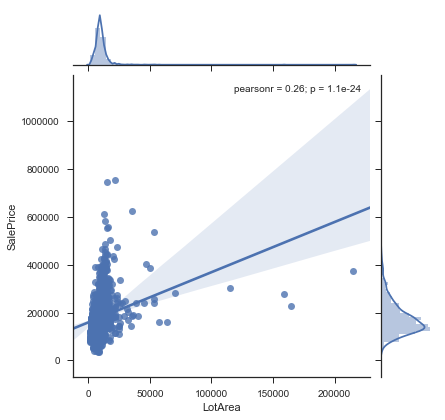

In [49]:
sns.jointplot(x='LotArea', y='SalePrice', data=ames, kind="reg") 

In [144]:
print(stats.linregress(ames.LotArea, ames.SalePrice))
ols('SalePrice ~ LotArea',data=ames).fit().params

LinregressResult(slope=2.0999719517076745, intercept=158836.1518968766, rvalue=0.2638433538714056, pvalue=1.1231391549186287e-24, stderr=0.2010575176984753)


Intercept    158836.151897
LotArea           2.099972
dtype: float64

## Street
       Grvl	Gravel	
       Pave	Paved

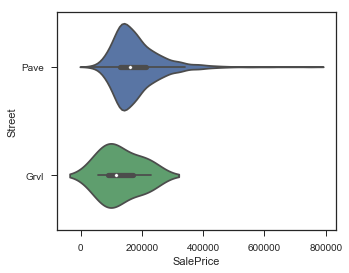

In [65]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="SalePrice", y="Street", data=ames)

In [60]:
stats.ttest_ind(ames.SalePrice[ames.Street == 'Pave'], 
                ames.SalePrice[ames.Street == 'Grvl'], equal_var = False)

Ttest_indResult(statistic=1.9007878559110067, pvalue=0.11504797250476277)

## Alley
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [77]:
# fill NA as "NoAccess"
ames.Alley.fillna("NoAccess",inplace=True)

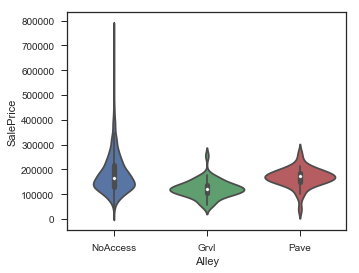

In [80]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="Alley", y="SalePrice", data=ames)

In [84]:
mod = ols('SalePrice ~ Alley',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
Alley     1.879109e+11     2.0  15.176614  2.996380e-07
Residual  9.020000e+12  1457.0        NaN           NaN


## LotShape
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

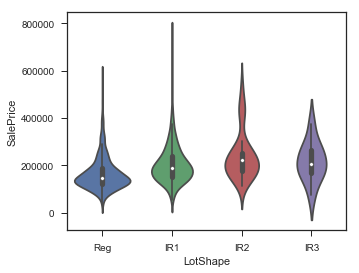

In [83]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LotShape", y="SalePrice", data=ames)

In [87]:
mod = ols('SalePrice ~ LotShape',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LotShape,7.032607e+11,3.0,40.132852,6.447524e-25
Residual,8.504651e+12,1456.0,NaN,NaN


## LandContour
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

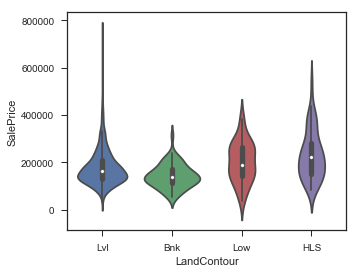

In [85]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LandContour", y="SalePrice", data=ames)

In [89]:
mod = ols('SalePrice ~ LandContour',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LandContour,2.375097e+11,3.0,12.850188,2.742217e-08
Residual,8.970402e+12,1456.0,NaN,NaN


## Utilities
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [95]:
ames.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

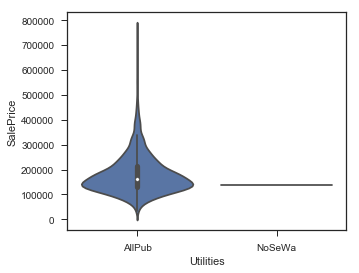

In [90]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="Utilities", y="SalePrice", data=ames)

In [96]:
mod = ols('SalePrice ~ Utilities',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Utilities,1.886693e+09,1.0,0.298804,0.584717
Residual,9.206025e+12,1458.0,NaN,NaN


## LotConfig
       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [97]:
ames.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

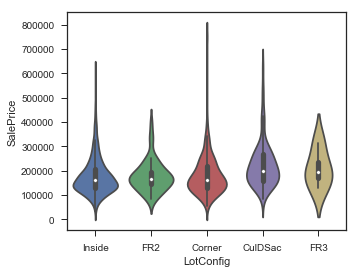

In [98]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LotConfig", y="SalePrice", data=ames)

In [100]:
mod = ols('SalePrice ~ LotConfig',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LotConfig,1.935444e+11,4.0,7.809954,0.000003
Residual,9.014367e+12,1455.0,NaN,NaN


## LandSlope
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [101]:
ames.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

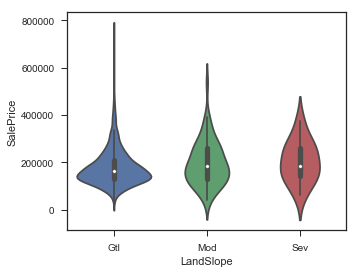

In [102]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LandSlope", y="SalePrice", data=ames)

In [104]:
mod = ols('SalePrice ~ LandSlope',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LandSlope,2.469217e+10,2.0,1.958817,0.141396
Residual,9.183219e+12,1457.0,NaN,NaN


## Condition1
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad


In [105]:
ames.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

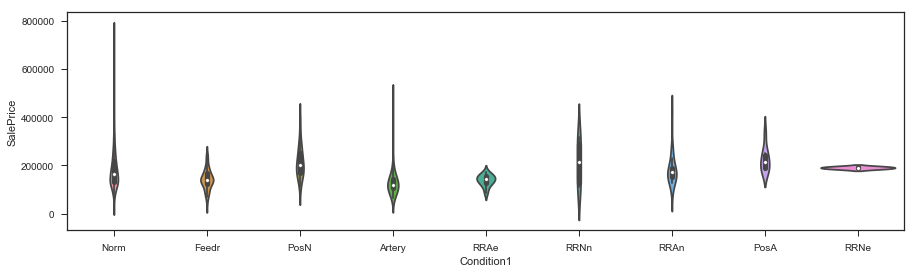

In [114]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="Condition1", y="SalePrice", data=ames)

In [115]:
mod = ols('SalePrice ~ Condition1',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Condition1,3.004600e+11,8.0,6.118017,8.904549e-08
Residual,8.907451e+12,1451.0,NaN,NaN


## Condition2


In [116]:
ames.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [118]:
ames[["Condition1","Condition2"]].head()

,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm


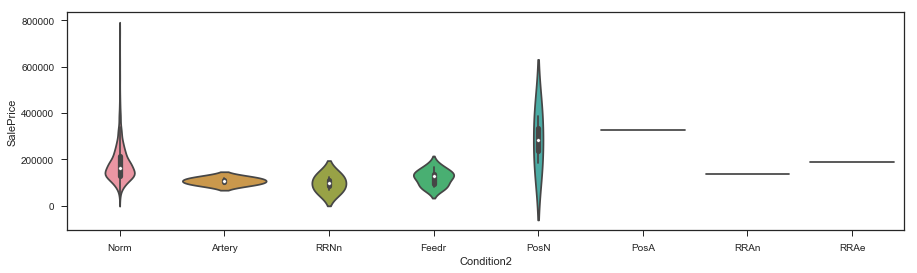

In [119]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="Condition2", y="SalePrice", data=ames)

In [121]:
mod = ols('SalePrice ~ Condition2',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Condition2,9.115059e+10,7.0,2.073899,0.043426
Residual,9.116761e+12,1452.0,NaN,NaN


## BldgType
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [122]:
ames.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

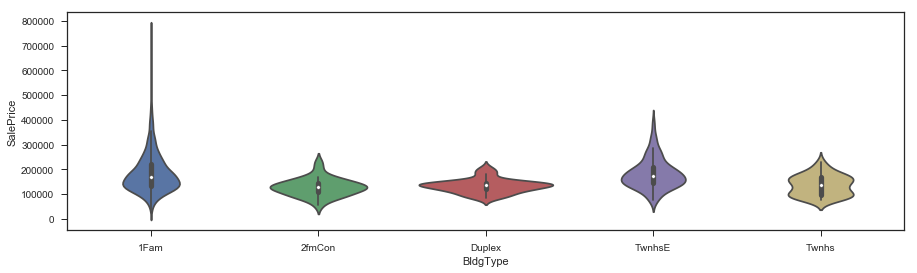

In [123]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="BldgType", y="SalePrice", data=ames)

In [124]:
mod = ols('SalePrice ~ BldgType',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
BldgType,3.179863e+11,4.0,13.011077,2.056736e-10
Residual,8.889925e+12,1455.0,NaN,NaN


## HouseStyle
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

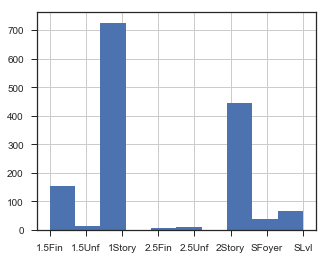

In [132]:
plt.figure(figsize=(5, 4))
ames.HouseStyle.hist()

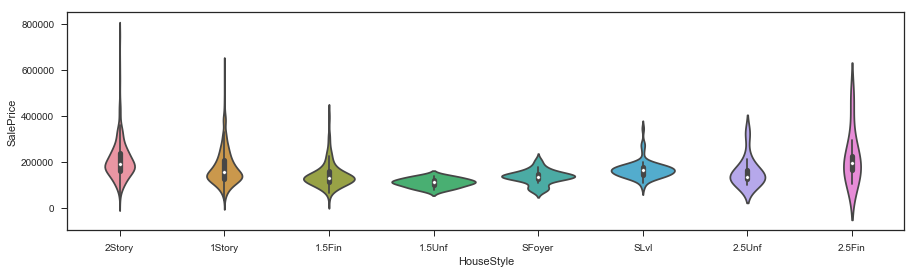

In [126]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="HouseStyle", y="SalePrice", data=ames)

In [127]:
mod = ols('SalePrice ~ HouseStyle',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
HouseStyle,7.947590e+11,7.0,19.595001,3.376777e-25
Residual,8.413152e+12,1452.0,NaN,NaN


## OverallQual
      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

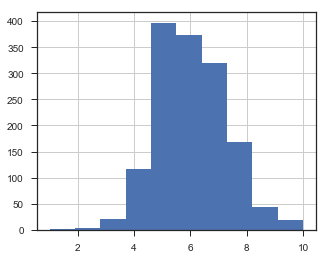

In [130]:
plt.figure(figsize=(5, 4))
ames.OverallQual.hist()

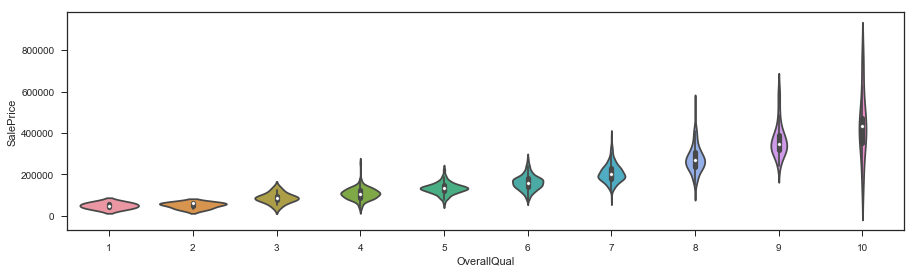

In [134]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="OverallQual", y="SalePrice", data=ames)

In [133]:
mod = ols('SalePrice ~ OverallQual',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
OverallQual,5.760947e+12,1.0,2436.770591,2.185675e-313
Residual,3.446964e+12,1458.0,NaN,NaN


## OverallCond


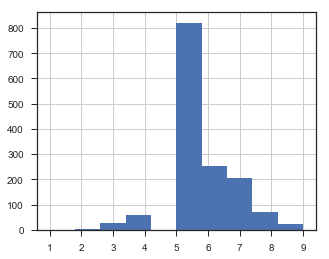

In [135]:
plt.figure(figsize=(5, 4))
ames.OverallCond.hist()

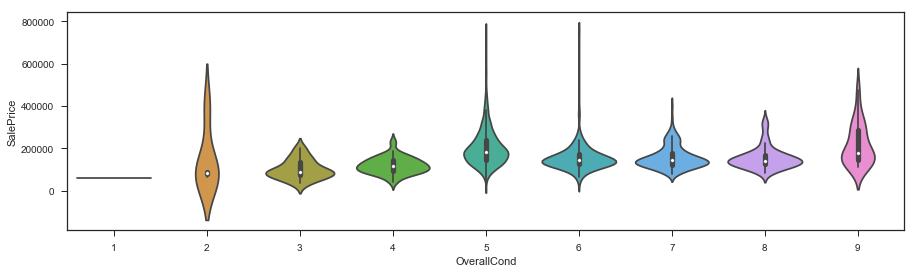

In [136]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="OverallCond", y="SalePrice", data=ames)

In [137]:
mod = ols('SalePrice ~ OverallCond',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
OverallCond,5.581413e+10,1.0,8.891623,0.002912
Residual,9.152097e+12,1458.0,NaN,NaN
